In [7]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [8]:
df = pd.read_csv("ridgereg_data.csv")
df.head()

,x,y
0,-2.399416,-94.347332
1,-1.052404,-38.791549
2,0.728651,28.546091
3,0.230848,-1.208761
4,0.040372,4.124889


In [12]:
x = df[['x']]
y = df[['y']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

As α increases, the slope of the fitted regression line decreases and the slope approaches zero (so regression line is almost flat). Smaller slope means that the predictions for y value is less sensitive to changes in x values. In general, ridge regression is shrinking parameters (and so by reducing variance) compared with usual linear regression.

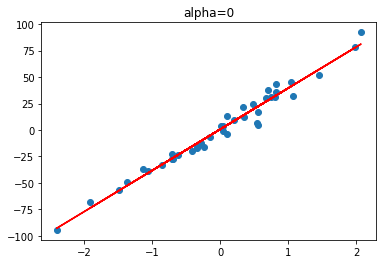

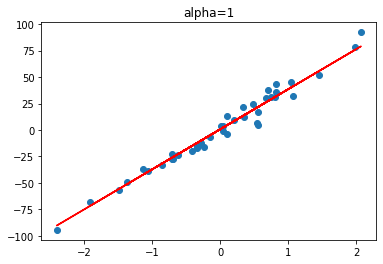

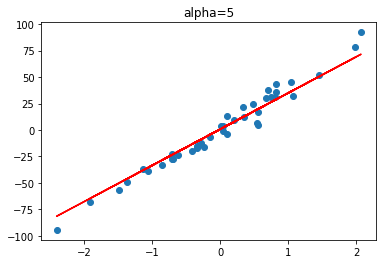

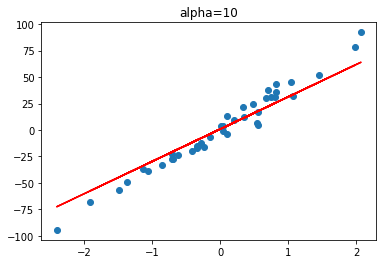

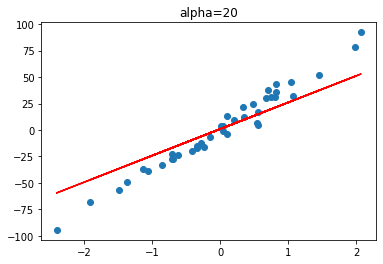

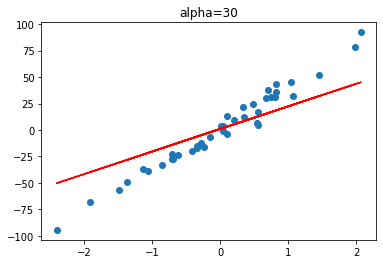

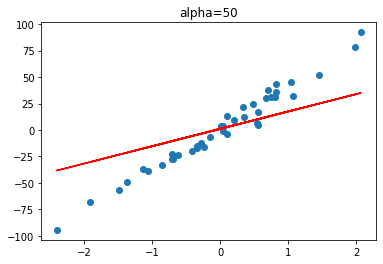

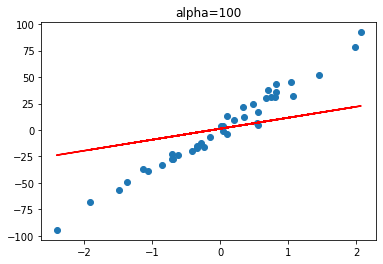

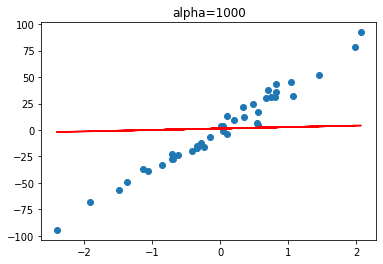

In [13]:
for alp in [0,1,5,10,20,30,50,100,1000]:
    rr = Ridge(alpha=alp)
    rr.fit(X_train, y_train)
    plt.scatter(X_train,y_train)
    plt.plot(X_train,rr.predict(X_train),color="red")
    plt.title("alpha="+str(alp))
    plt.show()

In order to find optimal value for α one could use cross-validation but we will simply try different values for α and compute the R2 score for each choise.

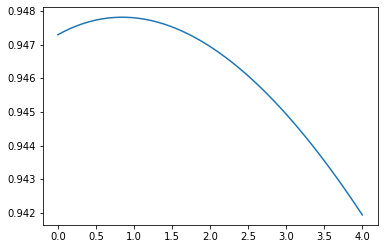

In [18]:
alphas = np.linspace(0,4,50) # past 4 the score decreases
r2values = []
for alp in alphas:
    rr = Ridge(alpha=alp)
    rr.fit(X_train, y_train)
    r2_test = r2_score(y_test, rr.predict(X_test))
    r2values.append(r2_test)


plt.plot(alphas,r2values)
plt.show()